In [1]:
# Parameters
MSA_MARKET = "Austin"
BRAND_MSA = "Austin, TX"


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os



In [3]:
# Import the function from your external script
from IOS_query import run_snowflake_query

# Run the query and get the results as a DataFrame
ios_df = run_snowflake_query()

# Display the DataFrame
ios_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNdb9sgFIb%2FisWubcCxnQQlqZJmWaN%2BZfmopt5hwAmrDRnguPn3JXEjdZpaaXfo8L7wnPPC4Oq1KoODMFZqNQQ4QiAQimku1XYINutZ2AOBdVRxWmolhuAoLLgaDSytyj0Z126nluJPLawL%2FEHKkvPGENRGEU2ttETRSljiGFmN7%2B9IHCGyN9pppkvwwfK1g1orjPOEFwu30uPtnNsTCJumiZpOpM0WxgghiPrQq06Sbxf9q%2B%2FpEz2GKDnpvcLLF%2B9sE6naEXyFlbciS27W60W4eFytQTC%2BoF5rZetKmJUwB8nEZnnXAlhP8Lu2rtHmxYYVlSqySjdFSV8E09W%2Bdv7IyK9gITgs9Vb6rufTIdi%2FSM539cz9%2BkF349te7wGJw3FC3ePt9mcvaSb3i5v06XlZfd%2FUpyZA8HSJNT7FOre2FnN1CtP5EoqTEOMwxusYE4xJnES9fvYMgqkPUyrqzs5%2FiCNW6pp7WiMoY8LaMyrjKmRbCdsStFbDU6qQd5OcoSxnNKV5kWVZt0txRjEWWdxJRRcViLJuWiCRZDFjXNB%2BN09zlqeM5v1%2BB7QvjZzZzei%2

/Users/lmola/Documents/Luis_Projects/OOH/prod/IOS_query.py:185: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(io_query, conn)


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,INBOUND_EXCLUSION_FLAG,OWNER,OPPORTUNITY_ID,QL_REFERRER_NAME,QL_REFERRER_ROLE,QL_SOURCED_BY_NAME,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL
0,0066S0000175jm8QAA,0016S00003NfmP8QAJ,0016S00003NfmP8QAJ,Request to delete,NY,None,10000,20234,2023-03-27,4,...,Include,Self Service,None,None,None,None,None,None,None,None
1,006PJ000002kch3YAA,001PJ000002pHorYAE,001PJ000002pHorYAE,New York,NY,None,10036,20242,2023-10-16,2,...,Include,Self Service,None,None,None,None,None,None,None,None
2,0066S00000zIOFvQAO,0016S000030nMjlQAE,0016S000030nMjlQAE,Woburn,Massachusetts,United States,01801,20222,2021-11-08,2,...,Include,MRA,None,None,None,None,None,None,None,None
3,0066S000012bzosQAA,0016S000037zmBCQAY,0016S000037zmBCQAY,Los Angeles,California,United States,00000,20231,2022-06-06,1,...,Include,Self Service,None,None,None,None,None,None,None,None
4,0066S0000176TJdQAM,0016S00003NgS5kQAF,0016S00003NgS5kQAF,Lanham,MD,None,20706,20234,2023-04-24,4,...,Include,MRA,None,None,None,None,None,None,None,None


In [4]:
# Import the function from your external script
from district_map_query import map_query

# Run the query and get the results as a DataFrame
map_df = map_query()
map_df = map_df[['ZIP_CODE__C', 'STATE__C', 'STATE_ABBREVIATION__C', 'MSA_MARKET_PRIMARY__C', 'MSA_NUMBER__C', 'MARKETING_DISTRICT__C']]

# Display the DataFram

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb9owFMW%2FSuQ9J7YDJGABFSvrhkRXBHQPe3OcCzUkNvN1mnaffuaf1Glqpb1FN%2Bf6d%2B499vDmpa6iZ3CorRkRnjASgVG21GY7Io%2Fru7hPIvTSlLKyBkbkFZDcjIco6%2BogJo1%2FMkv41QD6KBxkUBx%2FjEjjjLASNQoja0DhlVhN7uciTZiQiOB8wJFLS4k6sJ68PwhK27ZN2k5i3ZamjDHKBjSojpJP5A3i8DHj4Ky3ylbXlpcw0zsITln3iAiKQFhcGj9rc17BR5TiLELxbb1exIuH1ZpEk%2Bt0t9ZgU4NbgXvWCh6X87MBDA52DfrWuj3GtdQmQWPbTSX3oGx9aHw4MglfdAMlrexWh0XNpiNy2Oty%2BSXfOvuATPGOX7Z6oHbF7neaI87ha2%2B1REihMx0sdKevSPTjGmt6jHWG2MDMHMP0ocTSbsx5nPJ1ygVPBe8maZ%2F%2FJNE0hKmN9KfOfxwnqrJNGdw6kEoB4smqKk2stpqeSxTR0mNKtMy7hWJZoWRPFpssy%2FJc8kxyDlna6UHONkyqvLdh0M1SpUqQg7zoFaroKVkMBh1yvmni5N2N%2F2t%2FQ

/Users/lmola/Documents/Luis_Projects/OOH/prod/district_map_query.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
 map_df.head()

,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,97003,Oregon,OR,"Salem, OR MSA",41420.0,sanitized_f667cee84b45028f5db8f1939e1c06b90c06...
1,21866,Maryland,MD,"Salisbury, MD MSA",41540.0,DC Metro
2,90189,California,CA,"Los Angeles-Long Beach-Santa Ana, CA MSA",31100.0,Los Angeles
3,48557,Michigan,MI,"Flint, MI MSA",22420.0,Rest of Country
4,82931,Wyoming,WY,WY NONMETROPOLITAN AREA,99048.0,Rest of Country


In [6]:
missing_geo_map = map_df.isna().mean() * 100

print("Columns in IOs_filtered with missing values:")
print(missing_geo_map)

Columns in IOs_filtered with missing values:
ZIP_CODE__C              0.0
STATE__C                 0.0
STATE_ABBREVIATION__C    0.0
MSA_MARKET_PRIMARY__C    0.0
MSA_NUMBER__C            0.0
MARKETING_DISTRICT__C    0.0
dtype: float64


In [7]:
print(len(ios_df))
print(len(map_df))

merged_df = pd.merge(ios_df, map_df, left_on='BILLINGZIP', right_on = 'ZIP_CODE__C', how='inner')



print(len(merged_df))

print(f'loss is {1-len(merged_df)/len(ios_df)}')

# Convert the column to date format with specified format
merged_df['IO_DATE'] = pd.to_datetime(merged_df['IO_DATE'], format='%Y-%m-%d')

merged_df.head()

26811
42491
25750
loss is 0.03957330946253401


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,006PJ000002kch3YAA,001PJ000002pHorYAE,001PJ000002pHorYAE,New York,NY,None,10036,20242,2023-10-16,2,...,None,None,None,None,10036,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",35620.0,New York Metro
1,0066S00000zIOFvQAO,0016S000030nMjlQAE,0016S000030nMjlQAE,Woburn,Massachusetts,United States,01801,20222,2021-11-08,2,...,None,None,None,None,01801,Massachusetts,MA,"Boston-Cambridge-Quincy, MA-NH MSA",14460.0,New England
2,0066S0000176TJdQAM,0016S00003NgS5kQAF,0016S00003NgS5kQAF,Lanham,MD,None,20706,20234,2023-04-24,4,...,None,None,None,None,20706,Maryland,MD,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",47900.0,DC Metro
3,006PJ000001LpwkYAC,001PJ000001RoEjYAK,001PJ000001RoEjYAK,Sonoma,CA,United States,95476,20241,2023-08-14,1,...,None,None,None,None,95476,California,CA,"Santa Rosa-Petaluma, CA MSA",42220.0,Rest of Country
4,0066S00000xtFFbQAM,0016S00002wqy1nQAA,0016S00002wqy1nQAA,Emeryville,California,United States,94608,20221,2021-08-02,1,...,None,None,None,None,94608,California,CA,"San Francisco-Oakland-Fremont, CA MSA",41860.0,San Francisco


In [8]:
#from datetime import date

# today = date.today()

# # Convert to datetime and round to the start of the month
# today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
# end_date = today_month_start.strftime('%Y-%m-%d')

# print(end_date)

In [9]:
merged_df['IO_DATE']

0       2023-10-17
1       2021-11-09
2       2023-04-27
3       2023-08-20
4       2021-08-04
           ...    
25745   2023-05-22
25746   2024-09-11
25747   2024-02-27
25748   2023-05-08
25749   2022-05-09
Name: IO_DATE, Length: 25750, dtype: datetime64[ns]

In [10]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:
#import datetime
#merged_df["IO_DATE"] = pd.to_datetime(merged_df["IO_DATE"], errors="coerce")
# Add a 'year_month' column to group by month
merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period('M')
# Convert to datetime and round to the start of the month
#merged_df['check'] = merged_df["year_month"].to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
#end_date = today_month_start.strftime('%Y-%m-%d')

#merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period("M").to_timestamp()
print(merged_df["IO_DATE"])

# Aggregate by month, with multiple aggregations
monthly_aggregated = (
    merged_df.groupby(
        ["year_month", "STATE__C", "STATE_ABBREVIATION__C", "MSA_MARKET_PRIMARY__C"]
    )
    .agg(
        io_count=("IOS", "nunique"),  # Count rows per month
    )
    .reset_index()
)

0       2023-10-17
1       2021-11-09
2       2023-04-27
3       2023-08-20
4       2021-08-04
           ...    
25745   2023-05-22
25746   2024-09-11
25747   2024-02-27
25748   2023-05-08
25749   2022-05-09
Name: IO_DATE, Length: 25750, dtype: datetime64[ns]


In [12]:
monthly_aggregated.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
0,2021-06,Alabama,AL,AL NONMETROPOLITAN AREA,1
1,2021-06,Alabama,AL,"Huntsville, AL MSA",2
2,2021-06,Alabama,AL,"Montgomery, AL MSA",1
3,2021-06,Alaska,AK,"Anchorage, AK MSA",2
4,2021-06,Arizona,AZ,"Phoenix-Mesa-Scottsdale, AZ MSA",8


In [13]:
#Define Parameters


# MSA_MARKET = "New York"
# #STATE = "New York"
# BRAND_MSA = "New York, NY"

# BRAND_MSA_list = ["Austin, TX", "Denver, CO", "Los Angeles, CA", "Miami-Ft. Lauderdale, FL", 
#                   "New York, NY", "San Francisco-Oakland-San Jose, CA"]

# # Used as contains filter 
# MSA_MARKET_list = ["Austin", "Denver", "Los Angeles", "Miami", "New York", "San Francisco"]

# Used as equals filter
city_to_state = {
    "Austin": "Texas",
    "Denver": "Colorado",
    "Los Angeles": "California",
    "Miami": "Florida",
    "New York": "New York",
    "San Francisco": "California"
    
}

STATE = city_to_state[MSA_MARKET]

print('the state is ' + STATE)

#intervention_date = '2024-08-01'

campaign_start_dict = {'Austin, TX': '2024-09-09', 'Denver, CO': '2024-08-19', \
    'Los Angeles, CA': '2024-09-02', 'Miami-Ft. Lauderdale, FL': '2024-08-26',\
    'New York, NY': '2024-08-26', 'San Francisco-Oakland-San Jose, CA': '2024-09-02',\
    'Queens_New York': '2024-08-26', 'Brooklyn_New York': '2024-08-26',\
    'The Bronx_New York': '2024-08-26', 'Jersey City_New Jersey': '2024-08-26',\
    'Newark_New Jersey': '2024-08-26', 'San Jose_California': '2024-09-02'
    }


# Convert to datetime and round to the start of the month
month_start = pd.to_datetime(campaign_start_dict[BRAND_MSA]).to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
intervention_date = month_start.strftime('%Y-%m-%d')

print(intervention_date)
#date_start = campaign_start_dict[treatment_city_region]


the state is Texas
2024-09-01


In [14]:
city_monthly_data = monthly_aggregated[
    monthly_aggregated["MSA_MARKET_PRIMARY__C"].str.contains(MSA_MARKET, case=False)
    & (monthly_aggregated["STATE__C"] == STATE)
    #& (monthly_aggregated["year_month"] >= '2022')
].sort_values(by="year_month", ascending=True)

city_monthly_data.head(5)

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
103,2021-06,Texas,TX,"Austin-Round Rock, TX MSA",11
245,2021-07,Texas,TX,"Austin-Round Rock, TX MSA",14
358,2021-08,Texas,TX,"Austin-Round Rock, TX MSA",6
478,2021-09,Texas,TX,"Austin-Round Rock, TX MSA",12
608,2021-10,Texas,TX,"Austin-Round Rock, TX MSA",15


In [15]:
city_monthly_data["year_month"] = city_monthly_data["year_month"].dt.to_timestamp()
city_monthly_data.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
103,2021-06-01,Texas,TX,"Austin-Round Rock, TX MSA",11
245,2021-07-01,Texas,TX,"Austin-Round Rock, TX MSA",14
358,2021-08-01,Texas,TX,"Austin-Round Rock, TX MSA",6
478,2021-09-01,Texas,TX,"Austin-Round Rock, TX MSA",12
608,2021-10-01,Texas,TX,"Austin-Round Rock, TX MSA",15


In [16]:

#from datetime import date



print(intervention_date)

marketing_pre_period = city_monthly_data[
    city_monthly_data["year_month"] < intervention_date
][["year_month", "io_count"]]

today = dt.date.today()

# # Convert to datetime and round to the start of the month
today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
treatment_end_date = today_month_start.strftime('%Y-%m-%d')

print(treatment_end_date)


marketing_post_period = city_monthly_data[
    (city_monthly_data["year_month"]
    >= intervention_date) & (city_monthly_data["year_month"]
    < treatment_end_date)
][["year_month", "io_count"]]

marketing_pre_period.head()

# ['2010-02-05','2012-06-29']


# marketing_post_period.head()

2024-09-01
2024-11-01


,year_month,io_count
103,2021-06-01,11
245,2021-07-01,14
358,2021-08-01,6
478,2021-09-01,12
608,2021-10-01,15


In [17]:
df_final = city_monthly_data[['year_month', 'io_count']]
# Convert the date column to datetime (if it's not already)
df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary

# Set the date column as the index
df_final.set_index('year_month', inplace=True)
df_final.head()

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_30623/330667666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary


,io_count
year_month,
2021-06-01,11
2021-07-01,14
2021-08-01,6
2021-09-01,12
2021-10-01,15


In [18]:
type(marketing_post_period)

pandas.core.frame.DataFrame

In [19]:
# Combine data
#intervention_date = '2024-08-01'
data = pd.concat([marketing_pre_period, marketing_post_period])
data["intervention"] = data["year_month"] >= pd.to_datetime(intervention_date)
data["t"]=range(len(data))
data['month'] = data['year_month'].dt.month

data_final = data.set_index('year_month')


In [20]:
data.head()

,year_month,io_count,intervention,t,month
103,2021-06-01,11,False,0,6
245,2021-07-01,14,False,1,7
358,2021-08-01,6,False,2,8
478,2021-09-01,12,False,3,9
608,2021-10-01,15,False,4,10


In [21]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,11,False,0,6
2021-07-01,14,False,1,7
2021-08-01,6,False,2,8
2021-09-01,12,False,3,9
2021-10-01,15,False,4,10


In [22]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,11,False,36,6
2024-07-01,18,False,37,7
2024-08-01,20,False,38,8
2024-09-01,21,True,39,9
2024-10-01,13,True,40,10


In [23]:
data_final.isna().sum()

io_count        0
intervention    0
t               0
month           0
dtype: int64

In [24]:
data_final.head()


,io_count,intervention,t,month
year_month,,,,
2021-06-01,11,False,0,6
2021-07-01,14,False,1,7
2021-08-01,6,False,2,8
2021-09-01,12,False,3,9
2021-10-01,15,False,4,10


In [25]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,11,False,36,6
2024-07-01,18,False,37,7
2024-08-01,20,False,38,8
2024-09-01,21,True,39,9
2024-10-01,13,True,40,10


In [26]:
# Import the function from your external script
from direct_search_query import run_direct_search_query

# Run the query and get the results as a DataFrame
#direct_search_df = run_direct_search_query('New York', 'New York')
direct_search_df = run_direct_search_query(MSA_MARKET, STATE)

# Display the DataFrame
direct_search_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb9sgFMW%2FisWebbDj2AlKUmWJuqVKO69x96dvGOOEBYMHOG6%2F%2FYjdSJ2mVtobupwDv3sPzK6eauGdmDZcyTkIAwQ8JqkqudzPwUN%2B7U%2BAZyyRJRFKsjl4ZgZcLWaG1KLBy9Ye5D373TJjPXeQNLjfmINWS6yI4QZLUjODLcW75e0WRwHCjVZWUSXAK8v7DmIM09YRXiyl4Q7vYG2DIey6LuhGgdJ7GCGEIJpCpzpLPlz0T66nN%2FQhRPFZ7xROnr2wfeRyGMF7WMUgMvhznmd%2B9mWXA295QV0padqa6R3TJ07Zw%2F12ADCO4FdrbKf00fg14TIwUnWVIEdGVd201h0ZuBWsWAmF2nPX9WY9B82Rlz%2B2p%2B83N4dWiMckam1j2c9JsUeHdZfftvHqa9J8slkqM9JNKPC%2BXWKNzrFujGnZRp7DtK6EotgPQz8K8yjEYYQjFMRR%2FAi8tQuTS2J75z%2FEARWqLR2tZoRSZkyPSkvp0z2HQwkao%2BA5VVimcUFRUlAyJkWVJEmakjAhYciSaDRmKaoQoem4QixOIkpLRqZpMS5oMaakmE5HYHhpuGfXi%2F%2B

/Users/lmola/Documents/Luis_Projects/OOH/prod/direct_search_query.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(direct_query, conn)


,CITY,REGION,COUNTRY,MARKETING_CHANNEL,MONTH_START,MONTHLY_SUM
1360,Austin,Texas,United States,Direct,2022-03-01,785
2939,Austin,Texas,United States,Direct,2022-04-01,212
6572,Austin,Texas,United States,Direct,2022-05-01,208
8230,Austin,Texas,United States,Direct,2022-06-01,275
14298,Austin,Texas,United States,Direct,2022-07-01,5187


In [27]:
# Import the function from your external script
from brand_search_query import run_brand_search_query

# Run the query and get the results as a DataFrame
print(MSA_MARKET)
print(STATE)
print(BRAND_MSA)

brand_search_df = run_brand_search_query()

brand_search_df = brand_search_df[(brand_search_df['METRO'] == BRAND_MSA) & (brand_search_df['REGION'] == STATE)]

# Display the DataFrame
brand_search_df.head()

Austin
Texas
Austin, TX
Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb5swFMW%2FCvKewUACNFaSKmuaNmrSZQndpL7ZxqRewGa%2BprT99HP%2BSZ2mVtobupzr37n32MPLl7rynoUBqdUIRUGIPKG4LqTajtBDPvMvkAeWqoJWWokRehWALsdDoHXVkElrn9Ra%2FG4FWM8dpIDsf4xQaxTRFCQQRWsBxHKymSwXJA5CQgGEsQ6HTi0FSMd6srYhGHddF3S9QJstjsMwxOEAO9Ve8gW9QzSfMxqjrea6Ore8uJk%2BQEQ47O8RTuEIq1PjV6mOK%2FiMwo4iILd5vvJX3zY58ibn6a60grYWZiPMs%2BTiYb04GgDn4FcLttNmB35NpQpA6a6s6E5wXTetdUcG7guXosCV3kq3qPl0hJqdLAbr3uKmvv3JGnWdv6k7yu7g7WZ2sVles0nedRuxe2Ss38jld468H%2BdY432sc4BWzNU%2BTOtKYdz3o8iPozyOSBSTOAuSi%2F4j8qYuTKmoPXT%2B4zjglW4L59YIyrkAOFjlhfL5VuJjCQNovE8JF1mf8TBlnCaUlWmaZhmNUhpFIo17icjCMqQ8S8pQ9NOY80LQQcYSx

/Users/lmola/Documents/Luis_Projects/OOH/prod/brand_search_query.py:70: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(brand_query, conn)


,STATE,REGION,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
0,Texas,Texas,"Austin, TX",2863.060000,821,347,2024-09-01
164,Texas,Texas,"Austin, TX",2266.815911,589,216,2024-11-01
370,Texas,Texas,"Austin, TX",1610.100000,793,283,2023-06-01
496,Texas,Texas,"Austin, TX",1890.150000,826,288,2023-11-01
584,Texas,Texas,"Austin, TX",3058.370000,1033,399,2024-01-01


In [28]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,11,False,0,6
2021-07-01,14,False,1,7
2021-08-01,6,False,2,8
2021-09-01,12,False,3,9
2021-10-01,15,False,4,10


In [29]:
data_reset = data_final.reset_index()
data_reset.head()

,year_month,io_count,intervention,t,month
0,2021-06-01,11,False,0,6
1,2021-07-01,14,False,1,7
2,2021-08-01,6,False,2,8
3,2021-09-01,12,False,3,9
4,2021-10-01,15,False,4,10


In [30]:
# Join DataFrames

# Convert column to datetime
data_reset['year_month'] = pd.to_datetime(data_reset['year_month'])
direct_search_df['MONTH_START'] = pd.to_datetime(direct_search_df['MONTH_START'])

df_merge_1 = pd.merge(data_reset, direct_search_df, left_on = 'year_month', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_1 = df_merge_1.rename(columns={'MONTH_START': 'direct_month_start', 'MONTHLY_SUM': 'direct_search_sum'})
df_merge_1 = df_merge_1.drop(columns = 'MARKETING_CHANNEL')

df_merge_1.head()

,year_month,io_count,intervention,t,month,CITY,REGION,COUNTRY,direct_month_start,direct_search_sum
0,2022-03-01,11,False,9,3,Austin,Texas,United States,2022-03-01,785
1,2022-04-01,14,False,10,4,Austin,Texas,United States,2022-04-01,212
2,2022-05-01,8,False,11,5,Austin,Texas,United States,2022-05-01,208
3,2022-06-01,11,False,12,6,Austin,Texas,United States,2022-06-01,275
4,2022-07-01,8,False,13,7,Austin,Texas,United States,2022-07-01,5187


In [31]:
brand_search_df['MONTH_START'] = pd.to_datetime(brand_search_df['MONTH_START'])

df_merge_2 = pd.merge(df_merge_1, brand_search_df, left_on = 'direct_month_start', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_2.head()



,year_month,io_count,intervention,t,month,CITY,REGION_x,COUNTRY,direct_month_start,direct_search_sum,STATE,REGION_y,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
0,2022-03-01,11,False,9,3,Austin,Texas,United States,2022-03-01,785,Texas,Texas,"Austin, TX",1136.67,1075,260,2022-03-01
1,2022-04-01,14,False,10,4,Austin,Texas,United States,2022-04-01,212,Texas,Texas,"Austin, TX",1042.38,973,243,2022-04-01
2,2022-05-01,8,False,11,5,Austin,Texas,United States,2022-05-01,208,Texas,Texas,"Austin, TX",789.10,975,228,2022-05-01
3,2022-06-01,11,False,12,6,Austin,Texas,United States,2022-06-01,275,Texas,Texas,"Austin, TX",927.65,1006,254,2022-06-01
4,2022-07-01,8,False,13,7,Austin,Texas,United States,2022-07-01,5187,Texas,Texas,"Austin, TX",1223.34,824,227,2022-07-01


In [32]:
columns_to_drop = ['CITY', 'REGION_x', 'COUNTRY', 'direct_month_start', 'STATE', 'REGION_y', 'METRO', 'MONTH_START']

df_final2 = df_merge_2.drop(columns = columns_to_drop)
df_final2 = df_final2.set_index('year_month')
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,11,False,9,3,785,1136.67,1075,260
2022-04-01,14,False,10,4,212,1042.38,973,243
2022-05-01,8,False,11,5,208,789.10,975,228
2022-06-01,11,False,12,6,275,927.65,1006,254
2022-07-01,8,False,13,7,5187,1223.34,824,227


In [33]:
df_final2['direct_search_sum'].describe()

count       32.000000
mean     10377.656250
std       4389.458058
min        208.000000
25%       9774.250000
50%      11438.500000
75%      12984.250000
max      16096.000000
Name: direct_search_sum, dtype: float64

In [34]:
df_final2 = df_final2[df_final2['direct_search_sum'] > 2]	

In [35]:
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,11,False,9,3,785,1136.67,1075,260
2022-04-01,14,False,10,4,212,1042.38,973,243
2022-05-01,8,False,11,5,208,789.10,975,228
2022-06-01,11,False,12,6,275,927.65,1006,254
2022-07-01,8,False,13,7,5187,1223.34,824,227


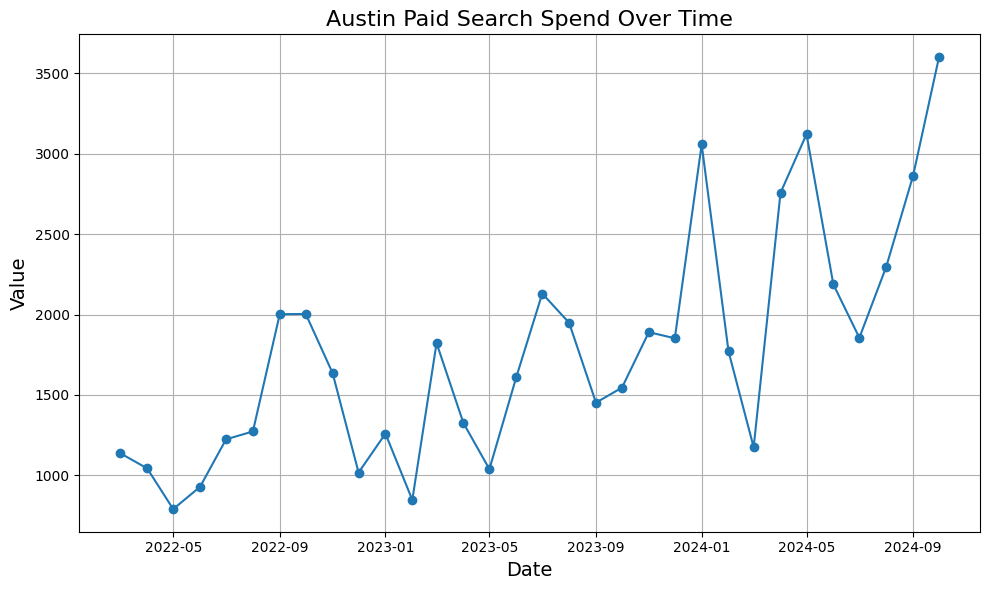

In [36]:

import matplotlib.pyplot as plt

df_series = df_final2.reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_series['year_month'], df_series['SPEND'], marker='o')

# Customize the plot
plt.title(f'{MSA_MARKET} Paid Search Spend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(fname = f'{MSA_MARKET} Paid Search Over Time')
# Show the plot
plt.show()

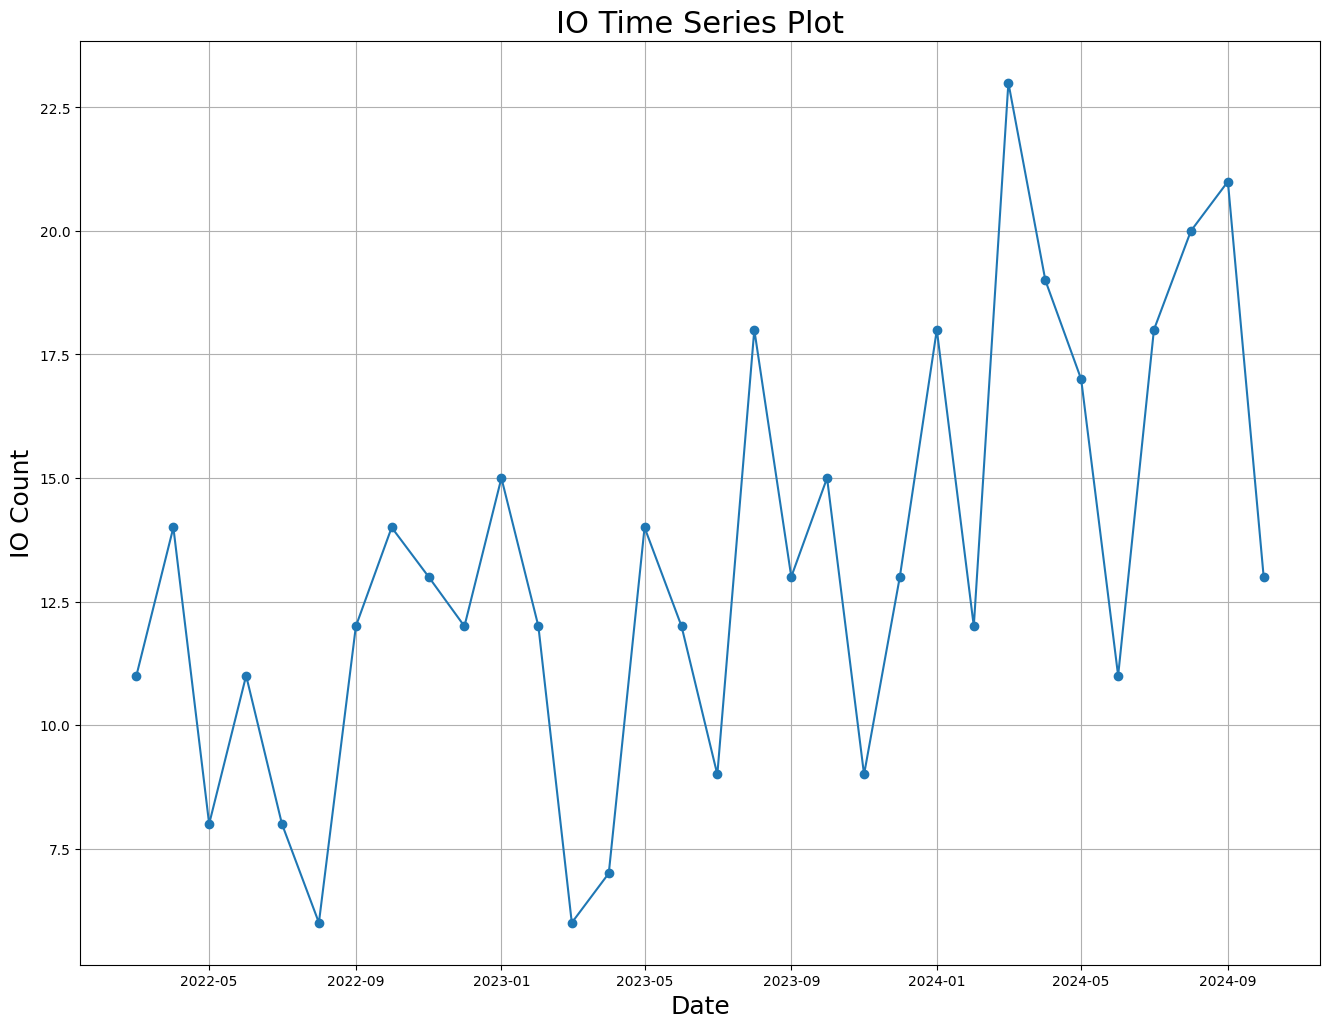

In [37]:
# Plot time series
#plt.plot(df_series['io_count'])


plt.figure(figsize=(16, 12))
plt.plot(df_series['year_month'], df_series['io_count'], marker='o')
plt.title('IO Time Series Plot', fontsize = 22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('IO Count', fontsize=18)
plt.grid(True)
plt.savefig(fname = f'{MSA_MARKET} IOs Over Time ')
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_series['io_count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.7283408288910995
p-value: 0.003731721850266663


<Figure size 1000x600 with 0 Axes>

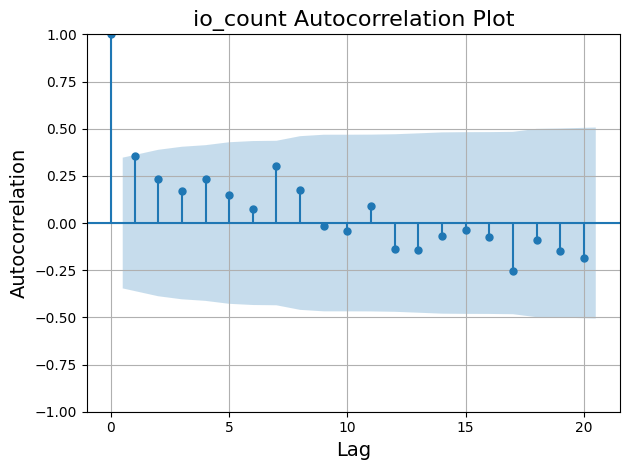

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(df_series['io_count'], lags=20)  # Specify number of lags
plt.title('io_count Autocorrelation Plot', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

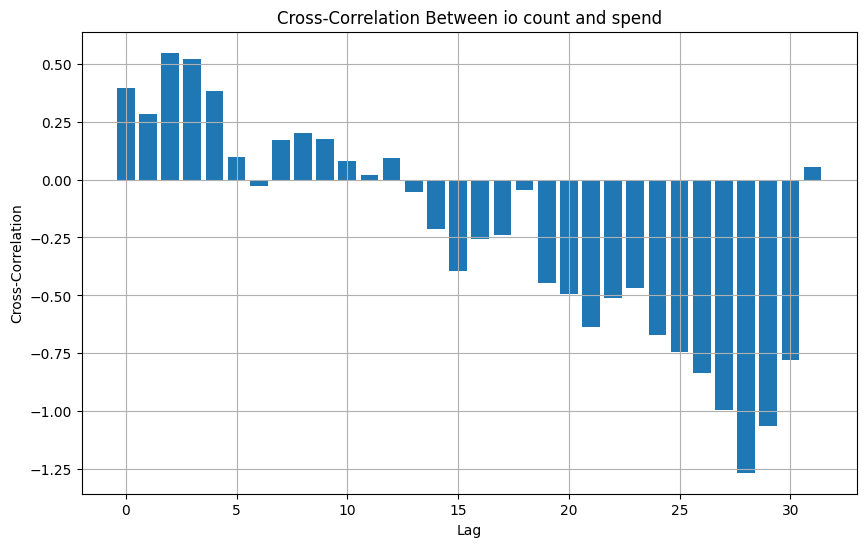

In [40]:
from statsmodels.tsa.stattools import ccf

# Compute cross-correlation between two features
cross_corr = ccf(df_series['io_count'], df_series['SPEND'])

# Plot the cross-correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(cross_corr)), cross_corr)
plt.title('Cross-Correlation Between io count and spend')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid()
plt.show()

In [41]:
#adding lags
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,11,False,9,3,785,1136.67,1075,260
2022-04-01,14,False,10,4,212,1042.38,973,243
2022-05-01,8,False,11,5,208,789.10,975,228
2022-06-01,11,False,12,6,275,927.65,1006,254
2022-07-01,8,False,13,7,5187,1223.34,824,227


In [42]:
k = 1
df_final3 = df_final2.copy()
df_final3['lag_SPEND'] = df_final3['SPEND'].shift(k)
df_final3['lag_direct_search_sum'] = df_final3['direct_search_sum'].shift(k)
df_final3['lag_IMPRESSIONS'] = df_final3['IMPRESSIONS'].shift(k)
df_final3['lag_io_count'] = df_final3['io_count'].shift(k)
df_final3 = df_final3.dropna()
df_final3.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2022-04-01,14,False,10,4,212,1042.38,973,243,1136.67,785.0,1075.0,11.0
2022-05-01,8,False,11,5,208,789.10,975,228,1042.38,212.0,973.0,14.0
2022-06-01,11,False,12,6,275,927.65,1006,254,789.10,208.0,975.0,8.0
2022-07-01,8,False,13,7,5187,1223.34,824,227,927.65,275.0,1006.0,11.0
2022-08-01,6,False,14,8,9360,1272.46,911,234,1223.34,5187.0,824.0,8.0


In [43]:
df_final3.tail()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2024-06-01,11,False,36,6,11663,2187.32,703,234,3122.28,12988.0,748.0,17.0
2024-07-01,18,False,37,7,12294,1855.29,646,236,2187.32,11663.0,703.0,11.0
2024-08-01,20,False,38,8,13847,2297.06,661,251,1855.29,12294.0,646.0,18.0
2024-09-01,21,True,39,9,16096,2863.06,821,347,2297.06,13847.0,661.0,20.0
2024-10-01,13,True,40,10,15602,3602.98,765,326,2863.06,16096.0,821.0,21.0


In [44]:
import causalpy as cp

seed=42
result4 = cp.InterruptedTimeSeries(
    data=df_final3,
    treatment_time=pd.Timestamp(intervention_date),
    formula="io_count ~ 1 + t + C(month) + direct_search_sum + SPEND + IMPRESSIONS + \
         + lag_io_count",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [beta, sigma]


/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.


There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


Sampling: [beta, sigma, y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


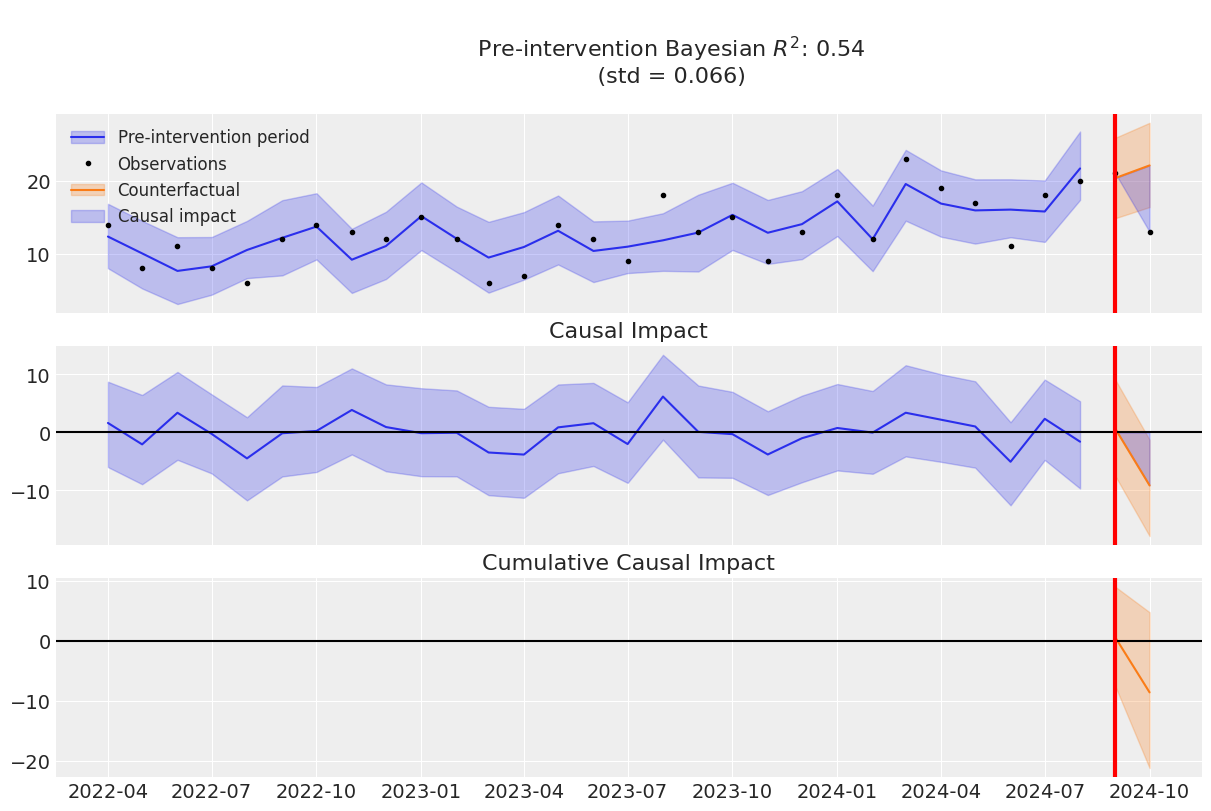

In [45]:
fig4, ax = result4.plot()

# Adjust the figure size
fig4.set_size_inches(12, 8)  # Example: Width = 12 inches, Height = 8 inches

In [72]:
import matplotlib.image as mpimg



fig4.savefig(f"{MSA_MARKET}_causal_impact_plot.png")
plt.close()  # Close the figure to avoid overwriting
print(f"Causal Graph for {MSA_MARKET} saved as {MSA_MARKET}_plot.png")
plt.axis('off')  # Turn off axes for better visualization
# img = mpimg.imread(f"{MSA_MARKET}_plot.png")#
# plt.imshow(img)

NameError: name 'fig4' is not defined

In [47]:
# List all attributes and methods of the model object
print(dir(result4))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_x_design_info', '_y_design_info', 'bayesian_plot', 'datapost', 'datapre', 'expt_type', 'formula', 'idata', 'input_validation', 'labels', 'model', 'ols_plot', 'outcome_variable_name', 'plot', 'post_X', 'post_impact', 'post_impact_cumulative', 'post_pred', 'post_y', 'pre_X', 'pre_impact', 'pre_pred', 'pre_y', 'print_coefficients', 'score', 'summary', 'supports_bayes', 'supports_ols', 'treatment_time']


In [48]:
pre_pred_samples = result4.pre_pred.posterior_predictive["y_hat"]
print(pre_pred_samples)  # Check the structure

<xarray.DataArray 'y_hat' (chain: 4, draw: 1000, obs_ind: 29)> Size: 928kB
array([[[16.98512792, 15.73830414,  4.3040254 , ..., 15.30239793,
         17.35583822, 17.06601153],
        [10.64435373,  2.7311716 , 16.406399  , ..., 16.40191633,
         14.4639796 , 28.83453874],
        [16.94828958, 12.78490777,  4.38258791, ..., 14.48043768,
          8.9196588 , 20.52052231],
        ...,
        [13.62166973,  5.90995149, -1.32092191, ..., 16.22670192,
         14.58849888, 15.06959089],
        [ 3.96777915,  8.12797216,  9.97989006, ..., 17.41389678,
          9.10033339, 27.71483911],
        [16.35387483,  6.78632859,  7.06736036, ..., 12.56753056,
         20.14466229, 13.51765799]],

       [[18.42925739, 12.59799336,  5.48455936, ...,  9.37622499,
         13.93482192, 22.27691905],
        [12.37671305,  5.56137233,  1.66903426, ...,  7.23503259,
         15.0219989 , 19.54531984],
        [ 8.40982264,  7.51021098, -6.99567445, ..., 15.40785148,
         16.19541969, 26.588

In [49]:
# Compute the mean prediction across posterior samples
pre_pred_mean = pre_pred_samples.mean(dim="draw")
pre_pred_mean


<xarray.DataArray 'y_hat' (chain: 4, obs_ind: 29)> Size: 928B
array([[12.21949798, 10.04958999,  7.54362126,  8.21094314, 10.45600015,
        12.08180132, 13.66399401,  9.16104884, 10.99036913, 15.10834089,
        12.116072  ,  9.34083539, 10.79912862, 13.11198041, 10.2146578 ,
        10.88733185, 11.79811725, 12.86180808, 15.2127859 , 12.77557947,
        13.90697689, 17.33388649, 12.09654317, 19.61181026, 16.63655458,
        15.76714504, 15.9069044 , 15.80048835, 21.49304518],
       [12.47624509, 10.06193159,  7.50084297,  8.201425  , 10.50955197,
        11.99399574, 13.73419123,  9.13739399, 11.09875403, 15.25345196,
        12.09750212,  9.38749328, 10.70761929, 13.11631507, 10.39643128,
        10.98937542, 11.91324253, 12.97087864, 15.40865378, 12.89547449,
        14.11959093, 17.29147838, 12.11001843, 19.59919146, 17.04317997,
        15.93985492, 15.9938602 , 15.56043303, 21.79494115],
       [12.40882831, 10.04675988,  7.75374385,  8.43525899, 10.41975015,
        12.24893281, 13.72701652,  9.02036722, 11.04673938, 15.22880979,
        11.96882898,  9.46091388, 10.79467038, 12.99613736, 10.61656073,
        11.13488891, 11.66618883, 12.77073968, 15.38291739, 12.6195261 ,
        13.90817879, 17.25309434, 11.92362598, 19.60860545, 16.91831164,
        15.9487085 , 16.23190424, 15.71191409, 21.49347545],
       [12.38905229, 10.08680458,  7.67101735,  8.18023725, 10.52251604,
        12.26557185, 13.87896795,  9.22227896, 11.1771572 , 14.95422545,
        12.0561438 ,  9.65485569, 10.9724866 , 13.31020209, 10.43512103,
        11.01595482, 11.93079823, 13.01173081, 15.20166068, 12.92442671,
        14.0646889 , 17.07374067, 12.00334919, 19.63126512, 16.64874007,
        16.25599276, 16.09620794, 15.55962818, 21.61039681]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * obs_ind  (obs_ind) int64 232B 0 1 2 3 4 5 6 7 8 ... 21 22 23 24 25 26 27 28

In [50]:
import arviz as az

az.summary(result4.post_impact.max("obs_ind"))
az.summary(result4.pre_pred.posterior_predictive["y_hat"].mean("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_hat,13.06,0.836,11.424,14.597,0.013,0.009,3958.0,3684.0,1.0


In [51]:
az.summary(result4.post_impact.max("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.698,4.188,-7.31,8.754,0.068,0.051,3772.0,3723.0,1.0


In [52]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-8.529,6.791,-19.604,2.915,0.116,0.083,3423.0,3292.0,1.0


In [53]:
from scipy.stats import norm

# Inputs
estimate = 56.046
lower_ci = 19.697
upper_ci = 93.348
z_critical = 1.645  # For a 90% confidence interval

# Calculate standard error
se = (upper_ci - lower_ci) / (2 * z_critical)

# Calculate z-score
z_score = estimate / se

# Calculate p-value
p_value = 2 * norm.sf(abs(z_score))
print(f"p-value: {p_value:.4f}")

p-value: 0.0123


In [54]:
# # get index of the final time point
# index_4 = result4.post_impact_cumulative.obs_ind.max()
# # grab the posterior distribution of the cumulative impact at this final time point
# last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# # get summary stats
# az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [55]:
df_series.tail()

,year_month,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
27,2024-06-01,11,False,36,6,11663,2187.32,703,234
28,2024-07-01,18,False,37,7,12294,1855.29,646,236
29,2024-08-01,20,False,38,8,13847,2297.06,661,251
30,2024-09-01,21,True,39,9,16096,2863.06,821,347
31,2024-10-01,13,True,40,10,15602,3602.98,765,326


In [56]:
#number of intervention periods
int_periods = df_series['intervention'].sum()

#rows with intervention
intervention_df = df_series.tail(int_periods)

int_dates = intervention_df[['year_month', 'io_count']].reset_index(drop=True)
int_dates['treatment_region'] = MSA_MARKET
# Add a column with the index number
int_dates['Index_Number'] = int_dates.index

int_dates.head()

,year_month,io_count,treatment_region,Index_Number
0,2024-09-01,21,Austin,0
1,2024-10-01,13,Austin,1


In [57]:
int_dates.iloc[0][0]

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_30623/3285902388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_dates.iloc[0][0]


Timestamp('2024-09-01 00:00:00')

In [58]:
for i in range(int_periods):
    if i ==0:
        az_df = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob=0.9))
    else:

        # Concatenate the row to the DataFrame
        #df = pd.concat([df, new_row], ignore_index=True)
        new_row = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob = 0.9))
        az_df = pd.concat([az_df, new_row], ignore_index=True)
        #az_df.concat(pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}))))

az_df['Index_Number'] = az_df.index
az_df['bayes_Stat_Sig'] = (~((az_df['hdi_5%'] < 0 )| (az_df['hdi_95%'] < 0)))
az_df.head()

az_join = pd.merge(int_dates, az_df, on = 'Index_Number', how = 'inner')
az_join['counter_io_count'] = az_join['io_count'] - az_join['mean']
az_join['perc_lift'] = round((az_join['io_count'] - az_join['counter_io_count'])/az_join['counter_io_count'], 4)

az_final = az_join[['Index_Number', 'year_month', 'treatment_region', 'io_count', \
    'counter_io_count', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_final =az_final.rename(columns = {'mean': 'bayes_uplift'})
az_final.head()


,Index_Number,year_month,treatment_region,io_count,counter_io_count,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
0,0,2024-09-01,Austin,21,20.396,0.604,4.291,0.0296,False,-6.414,7.700,0.069,0.054
1,1,2024-10-01,Austin,13,22.133,-9.133,4.410,-0.4126,False,-16.363,-1.885,0.072,0.051


In [59]:
# Save with the index column
az_final.to_csv(f"{MSA_MARKET}_monthly_uplift.csv", index=True)

In [60]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

az_cumulative = az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [61]:
int_dates

,year_month,io_count,treatment_region,Index_Number
0,2024-09-01,21,Austin,0
1,2024-10-01,13,Austin,1


In [62]:
result = int_dates.agg(
    treatment_start = ("year_month", "min"),
    treatment_end = ("year_month", "max"),
    io_sum = ("io_count", "sum")
).reset_index()

In [63]:
result

,index,year_month,io_count
0,treatment_start,2024-09-01,NaN
1,treatment_end,2024-10-01,NaN
2,io_sum,NaT,34.0


In [64]:
int_dates['io_count'].sum()

34

In [65]:
az_cumulative.head()

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-8.529,6.791,-19.604,2.915,0.116,0.083,3423.0,3292.0,1.0


In [66]:
#adjust the cumulative table

#az_cumulative['Index_Number'] = az_df.index
az_cumulative['bayes_Stat_Sig'] = (~((az_cumulative['hdi_5%'] < 0 )| (az_cumulative['hdi_95%'] < 0)))
#az_cumulative.head()
az_cumulative['io_sum'] = int_dates['io_count'].sum()
az_cumulative['counter_io_sum'] = az_final['counter_io_count'].sum()
az_cumulative['treatment_region'] = MSA_MARKET
az_cumulative['treatment_start'] = int_dates['year_month'].min()
az_cumulative['treatment_end'] = int_dates['year_month'].max()
#az_cumulative_join = pd.merge(az_cumulative_final, az_cumulative, on = 'Index_Number', how = 'inner')

#az_cumulative['counter_io_count'] = az_cumulative_join['io_count'] - az_join['mean']
az_cumulative['perc_lift'] = round((az_cumulative['io_sum'] - \
    az_cumulative['counter_io_sum'])/az_cumulative['counter_io_sum'], 4)

az_cumulative_final = az_cumulative[['treatment_region', 'treatment_start', 'treatment_end', \
    'io_sum', 'counter_io_sum', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_cumulative_final =az_cumulative_final.rename(columns = {'mean': 'bayes_uplift'})
az_cumulative_final.head()

,treatment_region,treatment_start,treatment_end,io_sum,counter_io_sum,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
x,Austin,2024-09-01,2024-10-01,34,42.529,-8.529,6.791,-0.2005,False,-19.604,2.915,0.116,0.083


In [67]:
# Save with the index column
az_cumulative_final.to_csv(f"{MSA_MARKET}_cumulative_uplift.csv", index=True)